# Santander Bank Binary Classification (Algorithm 2)
Using Deep Neural Networks

### Importing Packages

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

### Opening datasets

In [26]:
%%time
with open('../../data/reduced_training_data.csv') as file:
    training_data = pd.read_csv(file)

with open('../../data/reduced_testing_data.csv') as file:
    testing_data = pd.read_csv(file)

CPU times: user 7.06 s, sys: 1.29 s, total: 8.34 s
Wall time: 12.2 s


In [11]:
training_int_vals_only = training_data.iloc[:,2:]
training_target_vals_only = training_data['target']

### Peek at Data

In [20]:
training_data

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,-0.4594,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,-0.1162,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,2.3425,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,0.3243,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,15.5289,-13.9001


In [21]:
testing_data

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,6.9937,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,6.3545,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,5.7341,...,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,8.9032,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122


In [18]:
id_data_ts = testing_data.pop('ID_code')

### Deep Neural Network

### Model 1

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=256, activation='relu', input_shape=[training_int_vals_only.shape[1]]),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               45056     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 78,081
Trainable params: 78,081
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

In [35]:
%%time
history = model.fit(training_int_vals_only, training_target_vals_only, validation_split = 0.1, epochs=100, batch_size=10)

Epoch 1/100
18000/18000 [==============================] - 49s 3ms/step - loss: 0.2436 - accuracy: 0.9117 - auc: 0.8396 - val_loss: 0.2479 - val_accuracy: 0.9079 - val_auc: 0.8428
Epoch 2/100
18000/18000 [==============================] - 50s 3ms/step - loss: 0.2427 - accuracy: 0.9116 - auc: 0.8415 - val_loss: 0.2470 - val_accuracy: 0.9097 - val_auc: 0.8439
Epoch 3/100
18000/18000 [==============================] - 46s 3ms/step - loss: 0.2425 - accuracy: 0.9120 - auc: 0.8413 - val_loss: 0.2473 - val_accuracy: 0.9108 - val_auc: 0.8459
Epoch 4/100
18000/18000 [==============================] - 45s 3ms/step - loss: 0.2424 - accuracy: 0.9118 - auc: 0.8418 - val_loss: 0.2467 - val_accuracy: 0.9104 - val_auc: 0.8431
Epoch 5/100
18000/18000 [==============================] - 44s 2ms/step - loss: 0.2415 - accuracy: 0.9122 - auc: 0.8430 - val_loss: 0.2490 - val_accuracy: 0.9067 - val_auc: 0.8440
Epoch 6/100
18000/18000 [==============================] - 45s 2ms/step - loss: 0.2410 - accuracy: 0

18000/18000 [==============================] - 30s 2ms/step - loss: 0.2366 - accuracy: 0.9146 - auc: 0.8493 - val_loss: 0.2807 - val_accuracy: 0.9032 - val_auc: 0.8414
Epoch 47/100
18000/18000 [==============================] - 32s 2ms/step - loss: 0.2364 - accuracy: 0.9150 - auc: 0.8494 - val_loss: 0.2540 - val_accuracy: 0.9082 - val_auc: 0.8430
Epoch 48/100
18000/18000 [==============================] - 30s 2ms/step - loss: 0.2360 - accuracy: 0.9146 - auc: 0.8497 - val_loss: 0.2545 - val_accuracy: 0.9069 - val_auc: 0.8428
Epoch 49/100
18000/18000 [==============================] - 31s 2ms/step - loss: 0.2363 - accuracy: 0.9149 - auc: 0.8489 - val_loss: 0.2528 - val_accuracy: 0.9087 - val_auc: 0.8425
Epoch 50/100
18000/18000 [==============================] - 30s 2ms/step - loss: 0.2361 - accuracy: 0.9149 - auc: 0.8493 - val_loss: 0.2621 - val_accuracy: 0.9078 - val_auc: 0.8411
Epoch 51/100
18000/18000 [==============================] - 32s 2ms/step - loss: 0.2357 - accuracy: 0.9151 -

18000/18000 [==============================] - 40s 2ms/step - loss: 0.2348 - accuracy: 0.9158 - auc: 0.8512 - val_loss: 0.3024 - val_accuracy: 0.9057 - val_auc: 0.8413
Epoch 92/100
18000/18000 [==============================] - 40s 2ms/step - loss: 0.2347 - accuracy: 0.9158 - auc: 0.8515 - val_loss: 0.2694 - val_accuracy: 0.9065 - val_auc: 0.8405
Epoch 93/100
18000/18000 [==============================] - 40s 2ms/step - loss: 0.2351 - accuracy: 0.9159 - auc: 0.8507 - val_loss: 0.2723 - val_accuracy: 0.9054 - val_auc: 0.8418
Epoch 94/100
18000/18000 [==============================] - 41s 2ms/step - loss: 0.2346 - accuracy: 0.9157 - auc: 0.8512 - val_loss: 0.3121 - val_accuracy: 0.9061 - val_auc: 0.8408
Epoch 95/100
18000/18000 [==============================] - 39s 2ms/step - loss: 0.2346 - accuracy: 0.9158 - auc: 0.8516 - val_loss: 0.2892 - val_accuracy: 0.9057 - val_auc: 0.8403
Epoch 96/100
18000/18000 [==============================] - 39s 2ms/step - loss: 0.2348 - accuracy: 0.9160 -

In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'auc', 'val_loss', 'val_accuracy', 'val_auc'])

In [42]:
model.save('class_model_100e_10b')

INFO:tensorflow:Assets written to: class_model_100e_10b/assets


INFO:tensorflow:Assets written to: class_model_100e_10b/assets


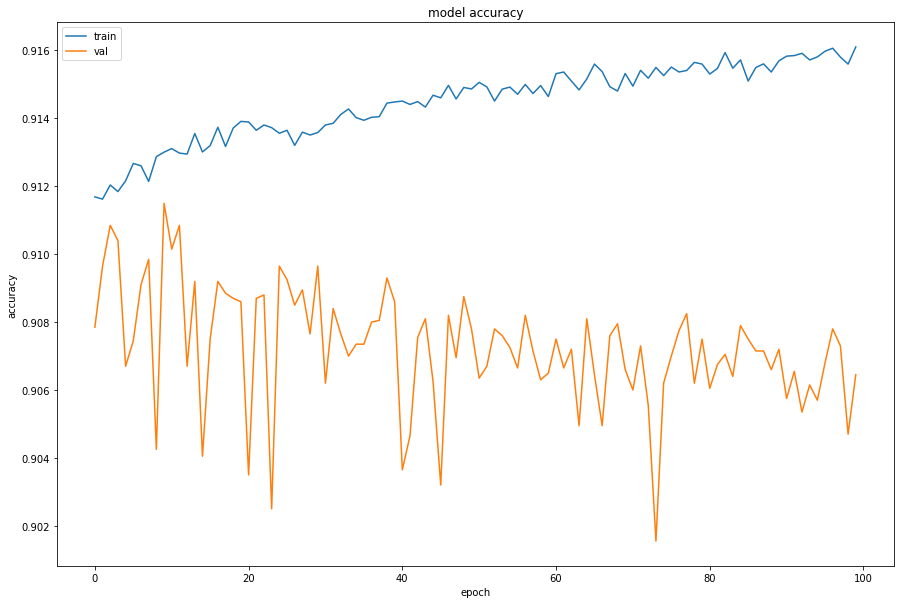

In [43]:
plt.figure(figsize=(15,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

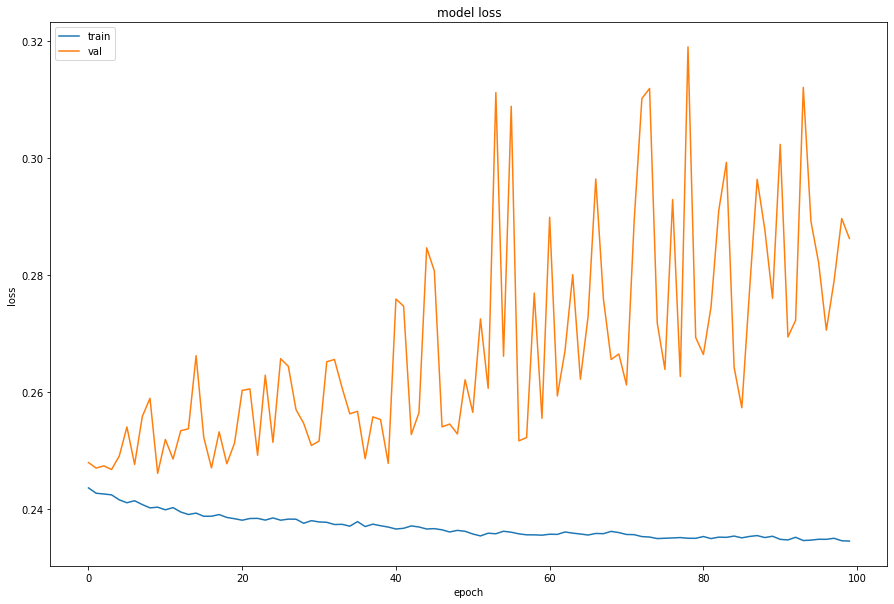

In [44]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

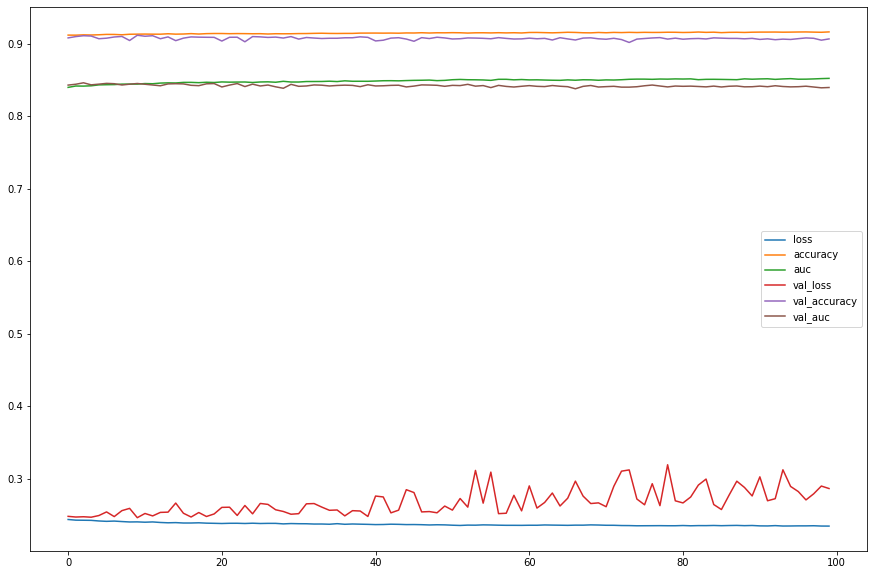

In [39]:
pd.DataFrame(history.history).plot(figsize=(15,10))
plt.show()

In [40]:
# Make predictions on the test set
predictions = model.predict(testing_data)
predictions = np.round(predictions).astype(int).flatten()

# Create the submission file
data = np.column_stack((id_data_ts, predictions))
submission = pd.DataFrame(data, columns=['ID_code', 'target'])
submission.to_csv('submission_DNN.csv', index=False)

print("Submission file created successfully!")

6250/6250 [==============================] - 6s 883us/step
Submission file created successfully!


### Model 2

In [46]:
%%time
history1 = model.fit(training_int_vals_only, training_target_vals_only, validation_split = 0.1, epochs=10, batch_size=32)

Epoch 1/10
5625/5625 [==============================] - 15s 3ms/step - loss: 0.2301 - accuracy: 0.9174 - auc: 0.8571 - val_loss: 0.3149 - val_accuracy: 0.9074 - val_auc: 0.8394
Epoch 2/10
5625/5625 [==============================] - 14s 2ms/step - loss: 0.2308 - accuracy: 0.9169 - auc: 0.8569 - val_loss: 0.2841 - val_accuracy: 0.9064 - val_auc: 0.8402
Epoch 3/10
5625/5625 [==============================] - 14s 3ms/step - loss: 0.2302 - accuracy: 0.9176 - auc: 0.8568 - val_loss: 0.2734 - val_accuracy: 0.9062 - val_auc: 0.8397
Epoch 4/10
5625/5625 [==============================] - 14s 2ms/step - loss: 0.2300 - accuracy: 0.9173 - auc: 0.8572 - val_loss: 0.2991 - val_accuracy: 0.9049 - val_auc: 0.8398
Epoch 5/10
5625/5625 [==============================] - 15s 3ms/step - loss: 0.2300 - accuracy: 0.9172 - auc: 0.8577 - val_loss: 0.2961 - val_accuracy: 0.9061 - val_auc: 0.8402
Epoch 6/10
5625/5625 [==============================] - 14s 2ms/step - loss: 0.2299 - accuracy: 0.9174 - auc: 0.857

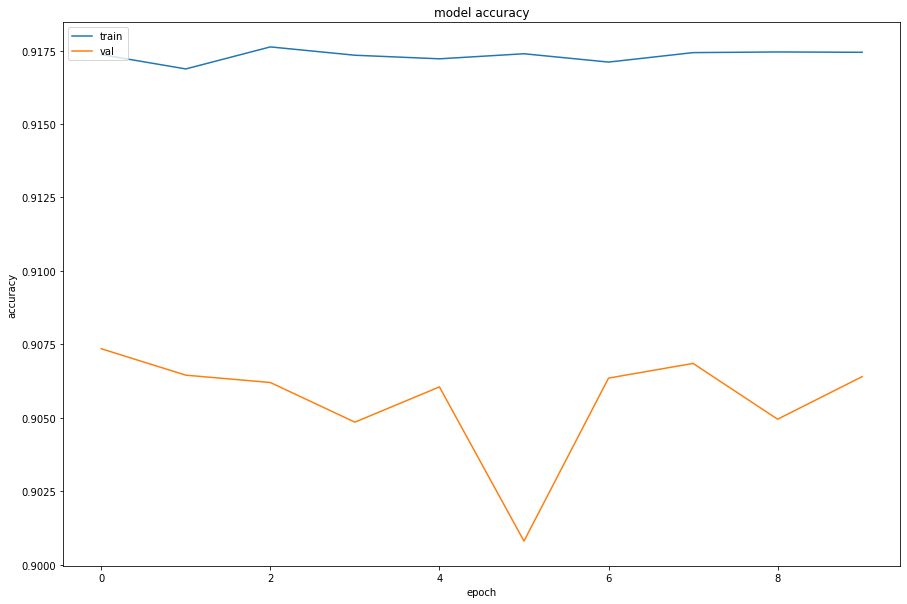

In [47]:
plt.figure(figsize=(15,10))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

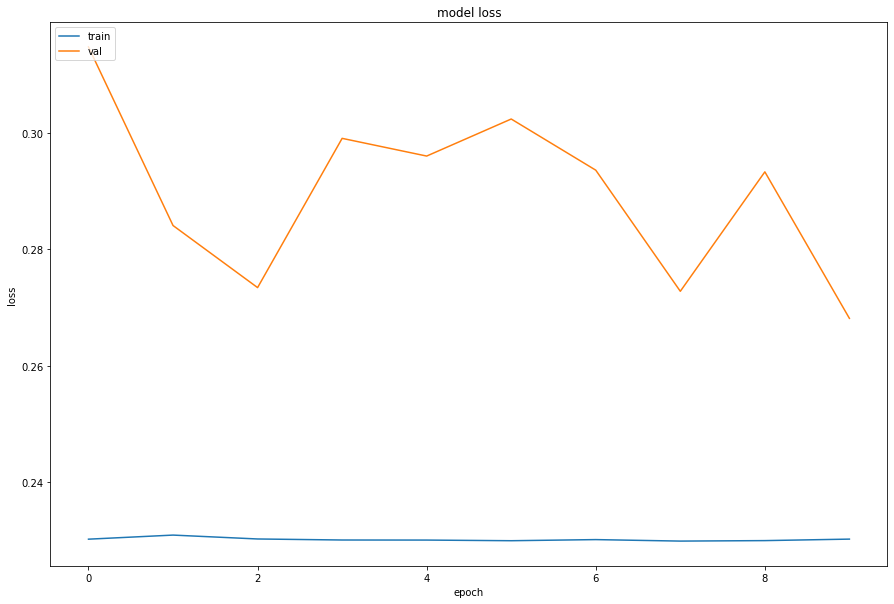

In [48]:
plt.figure(figsize=(15,10))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Extracting Predictions

In [49]:
# Make predictions on the test set
predictions = model.predict(testing_data)
predictions = np.round(predictions).astype(int).flatten()

# Create the submission file
data = np.column_stack((id_data_ts, predictions))
submission = pd.DataFrame(data, columns=['ID_code', 'target'])
submission.to_csv('submission_DNN1.csv', index=False)

print("Submission file created successfully!")

6250/6250 [==============================] - 5s 866us/step
Submission file created successfully!
